# EDA

### Step 1: Problem statement and data collection

In [2]:
import pandas as pd

total_data = pd.read_csv('/workspaces/JLL_Decision_Trees_ML/data/raw/full_data_diabetes.csv', sep=',')
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Step 2: Exploration and data cleaning

In [3]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* There are a total of 768 rows (in this case, people) and 9 columns, among which we find the target or class to predict, Outcome.
* No null values
* The data has 7 numerical characteristics and 5 categorical characteristics


***Eliminate duplicates***

In [4]:
total_data.drop("Pregnancies", axis = 1).duplicated().sum()

0

* No duplicates 

***Eliminate irrelevant information***

* There is no irrelevant information

### Step 3: Analysis of univariate variables

***Numerical variables***

In [5]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


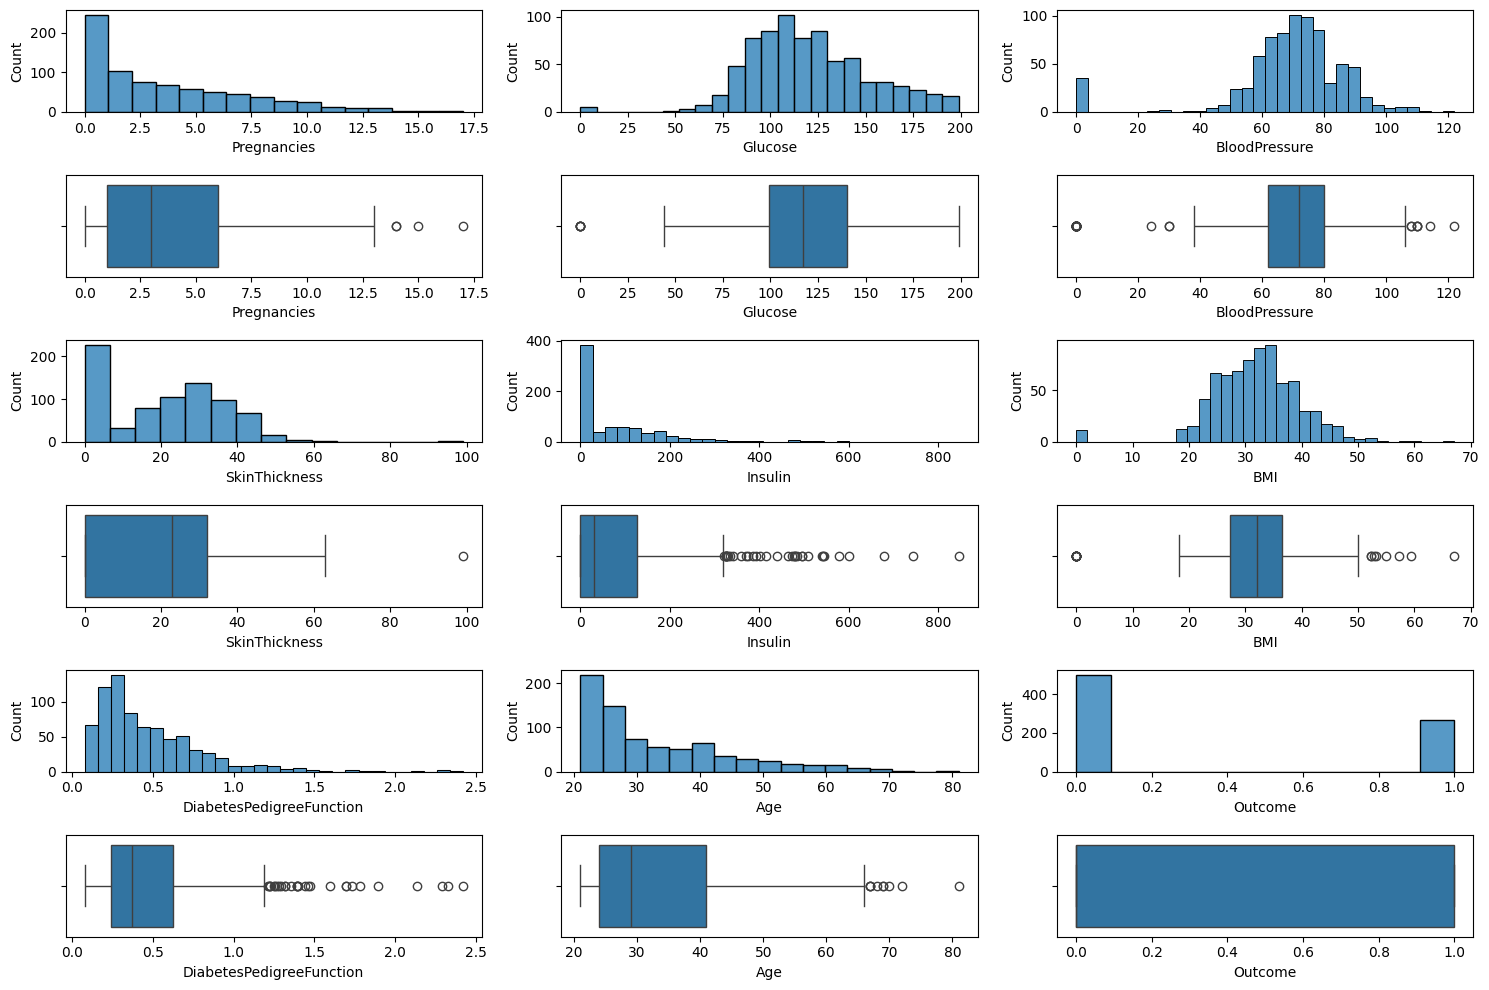

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(6, 3, figsize = (15, 10))

sns.histplot(ax = axis[0, 0], data = total_data, x = "Pregnancies")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "Pregnancies")
sns.histplot(ax = axis[0, 1], data = total_data, x = "Glucose")
sns.boxplot(ax = axis[1, 1], data = total_data, x = "Glucose")
sns.histplot(ax = axis[0, 2], data = total_data, x = "BloodPressure")
sns.boxplot(ax = axis[1, 2], data = total_data, x = "BloodPressure")
sns.histplot(ax = axis[2, 0], data = total_data, x = "SkinThickness")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "SkinThickness")
sns.histplot(ax = axis[2, 1], data = total_data, x = "Insulin")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "Insulin")
sns.histplot(ax = axis[2, 2], data = total_data, x = "BMI")
sns.boxplot(ax = axis[3, 2], data = total_data, x = "BMI")
sns.histplot(ax = axis[4, 0], data = total_data, x = "DiabetesPedigreeFunction")
sns.boxplot(ax = axis[5, 0], data = total_data, x = "DiabetesPedigreeFunction")
sns.histplot(ax = axis[4, 1], data = total_data, x = "Age")
sns.boxplot(ax = axis[5, 1], data = total_data, x = "Age")
sns.histplot(ax = axis[4, 2], data = total_data, x = "Outcome")
sns.boxplot(ax = axis[5, 2], data = total_data, x = "Outcome")

plt.tight_layout()
plt.show()

* We see how in our target column the cases of diabetes are almost half of those who do not have diabetes. Generally, all variables are uniform:
    * Age predominates in people over 20 years old and is the most studied category
    * We will later analyze the outliars of variables that may be interesting such as insulin, blood pressure or BMI

### Step 4: Analysis of multivariate variables

In [29]:
total_data.rename(columns={ 'DiabetesPedigreeFunction': 'Pedigree' }, inplace=True)
total_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


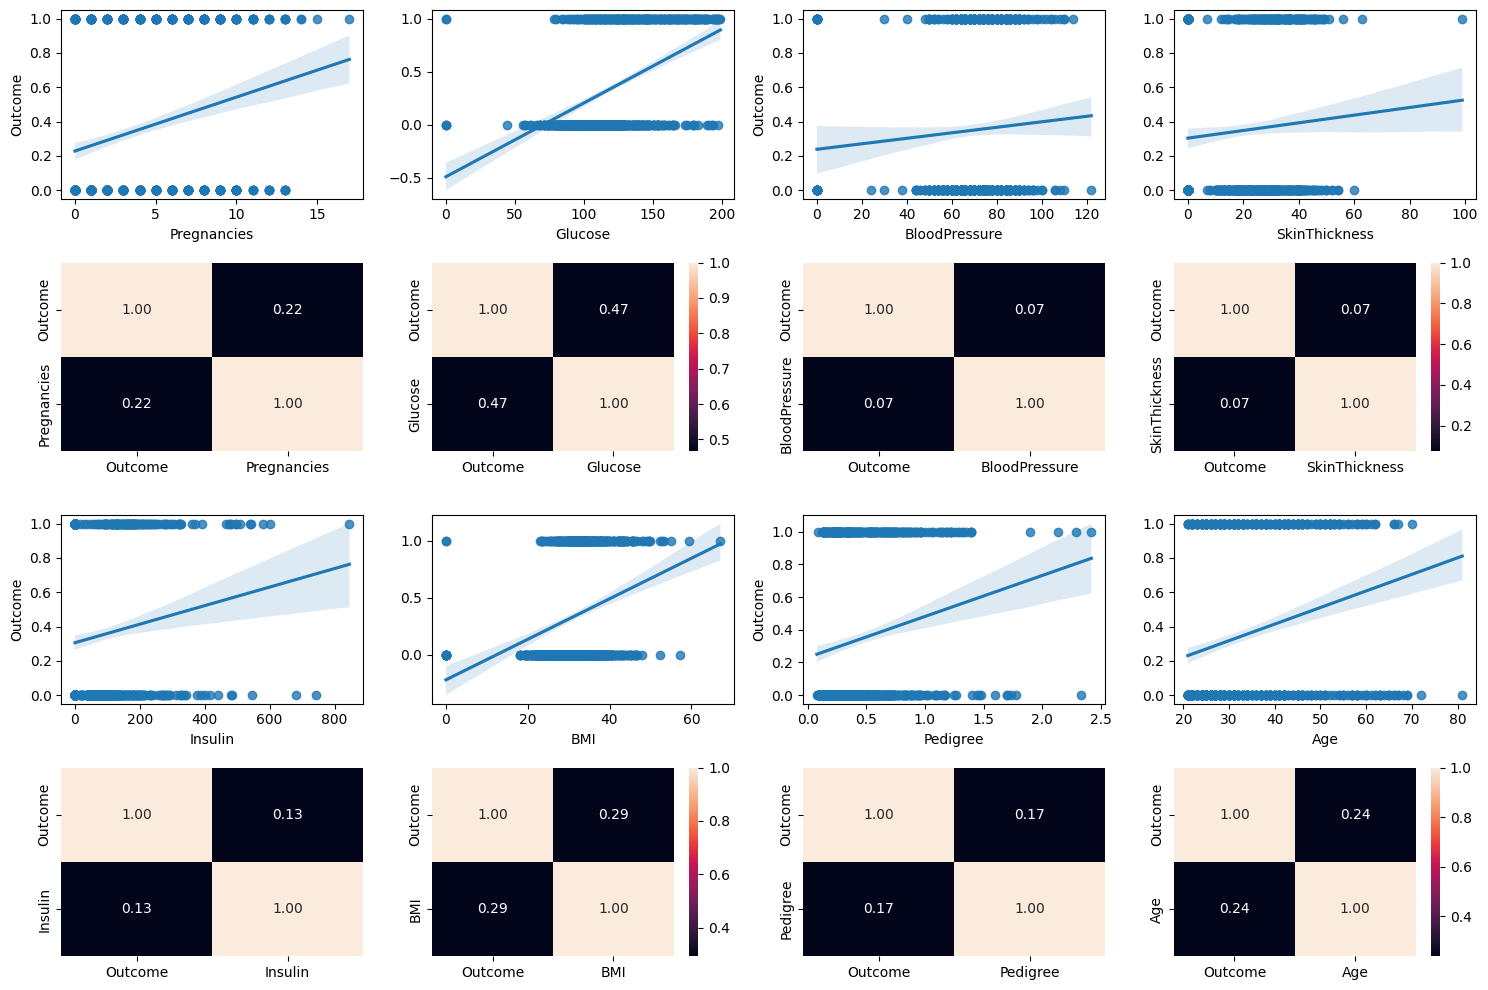

In [30]:
fig, axis = plt.subplots(4,4, figsize = (15,10))



sns.regplot(ax = axis[0, 0], data = total_data, x = "Pregnancies", y = "Outcome")
sns.heatmap(total_data[["Outcome", "Pregnancies"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "Glucose", y = "Outcome").set(ylabel=None)
sns.heatmap(total_data[["Outcome", "Glucose"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[0, 2], data = total_data, x = "BloodPressure", y = "Outcome")
sns.heatmap(total_data[["Outcome", "BloodPressure"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)
sns.regplot(ax = axis[0, 3], data = total_data, x = "SkinThickness", y = "Outcome").set(ylabel=None)
sns.heatmap(total_data[["Outcome", "SkinThickness"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 3])
sns.regplot(ax = axis[2, 0], data = total_data, x = "Insulin", y = "Outcome")
sns.heatmap(total_data[["Outcome", "Insulin"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)
sns.regplot(ax = axis[2, 1], data = total_data, x = "BMI", y = "Outcome").set(ylabel=None)
sns.heatmap(total_data[["Outcome", "BMI"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])
sns.regplot(ax = axis[2, 2], data = total_data, x = "Pedigree", y = "Outcome")
sns.heatmap(total_data[["Outcome", "Pedigree"]].corr(), annot = True, fmt = ".2f", ax = axis[3,2], cbar = False)
sns.regplot(ax = axis[2, 3], data = total_data, x = "Age", y = "Outcome").set(ylabel=None)
sns.heatmap(total_data[["Outcome", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[3,3])

plt.tight_layout()
plt.show()

* We can see that the variables that are most related to our target are BMI and glucose. We will analyze the relationship between them
* We also highlight that the pregnancy and the age values are interesting

***Correlation analysis***

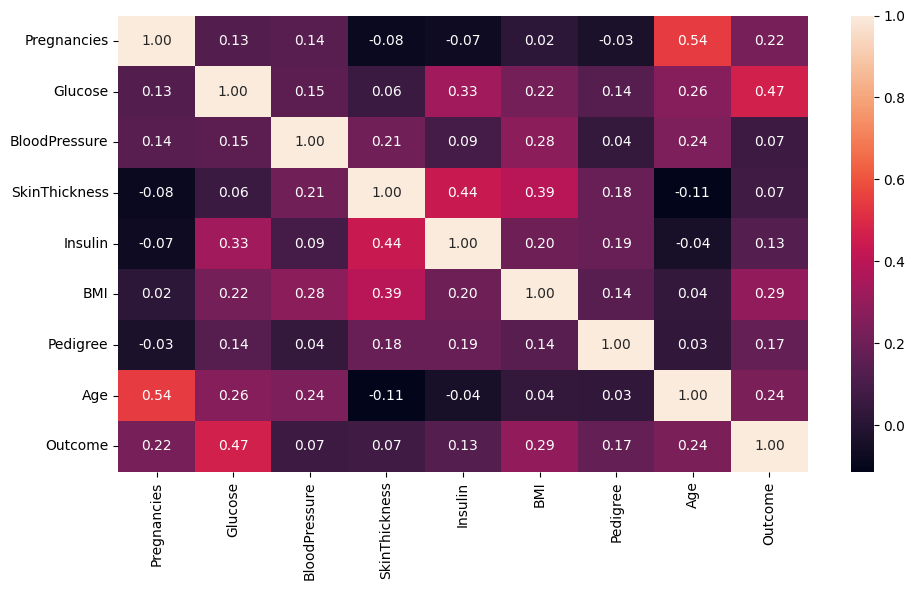

In [32]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data.corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

* The correlation analysis shows us how there are clearly relationships between the variables, some more important than others
* If we focus on our target, we must take into account aspects such as glucose, age and how they all behave
* We will see how the SelectKbest model provides us with some variables that are more important than others and after that we will analyze the outliers

### Step 5: Feature engineering

***Feature scaling***

In [34]:
from sklearn.model_selection import train_test_split

num_variables = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Pedigree", "Age"]

# We divide the dataset into training and test samples
X = total_data.drop("Outcome", axis = 1)[num_variables]
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


### Step 6: Feature selection

In [37]:
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump

selection_model = SelectKBest(f_classif, k = 7)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

dump(selection_model, open('/workspaces/JLL_Decision_Trees_ML/models/selection_model.pk', "wb"))

X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,Pedigree,Age
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0


In [ ]:
X_train_sel["Outcome"] = list(y_train)
X_test_sel["Outcome"] = list(y_test)
X_train_sel.to_csv("/workspaces/JLL_Decision_Trees_ML/data/processed/clean_diabetes_train.csv", index=False)
X_test_sel.to_csv("/workspaces/JLL_Decision_Trees_ML/data/processed/clean_diabetes_test.csv", index=False)